In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Constants
EXP_DATA_DIR = "E:\\IITP\\Academics\\7th Semester 26 Jul'23 -\\BTP\\Experiment Data\\Plots"
THR_DATA_DIR = "E:\\IITP\\Academics\\7th Semester 26 Jul'23 -\\BTP\\TheoreticalPlotImages"
IMAGE_SIZE = (100, 100)

# Lists to store data
exp_data_list = []
thr_data_list = []

# Dictionary to map the axis to a one-hot encoded list
axis_map = {
    "X": [1, 0, 0],
    "Y": [0, 1, 0],
    "Z": [0, 0, 1]
}

In [3]:
# Iterate over files to populate the list
for filename in os.listdir(THR_DATA_DIR):
    if filename.endswith(".png") and any(axis in filename for axis in ["X", "Y"]):

        # Split filename to extract details
        parts = filename.split("_")
        status = parts[0]
        hz = int(parts[1].split("-")[0].replace("Hz", ""))
        axis = filename.split("-")[1]

        # Set label based on status
        label = 1 if status == "faulty" else 0

        # Read and resize the image using TensorFlow
        path = os.path.join(THR_DATA_DIR, filename)
        image = tf.io.read_file(path)
        image = tf.image.decode_png(image, channels=1)  # Decoding to grayscale
        image = tf.image.resize(image, IMAGE_SIZE)
        image = tf.squeeze(image).numpy()  # Convert tensor to numpy array

        # Append to the data list
        thr_data_list.append([image, hz, label, axis_map[axis]])


In [4]:
# Iterate over files to populate the list
for filename in os.listdir(EXP_DATA_DIR):
    if filename.endswith(".png") and any(axis in filename for axis in ["X", "Y"]):

        # Split filename to extract details
        parts = filename.split("_")
        status = parts[0]
        hz = int(parts[1].split("-")[0].replace("Hz", ""))
        axis = filename.split("-")[1]

        # Set label based on status
        label = 1 if status == "Faulty" else 0

        # Read and resize the image using TensorFlow
        path = os.path.join(EXP_DATA_DIR, filename)
        image = tf.io.read_file(path)
        image = tf.image.decode_png(image, channels=1)  # Decoding to grayscale
        image = tf.image.resize(image, IMAGE_SIZE)
        image = tf.squeeze(image).numpy()  # Convert tensor to numpy array

        # Append to the data list
        exp_data_list.append([image, hz, label, axis_map[axis]])


Theoretical Data Plots


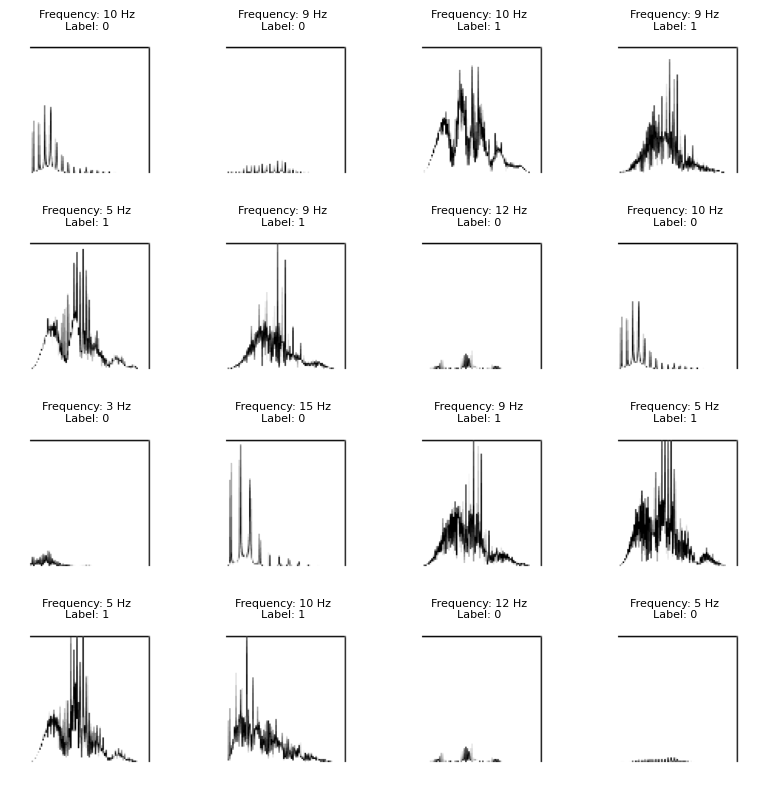

In [5]:
print('Theoretical Data Plots')
# Generate 16 random indices from test_list
random_indices = np.random.choice(len(thr_data_list), 16, replace=False)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    current_sample = thr_data_list[random_indices[i]]
    image, frequency, label, _ = current_sample

    ax.imshow(image, cmap="gray")
    ax.set_title(f"Frequency: {frequency} Hz\nLabel: {label}", fontsize=8)
    
    # Remove axis ticks
    ax.axis('off')

plt.tight_layout()
plt.show()

Experimental Data Plots


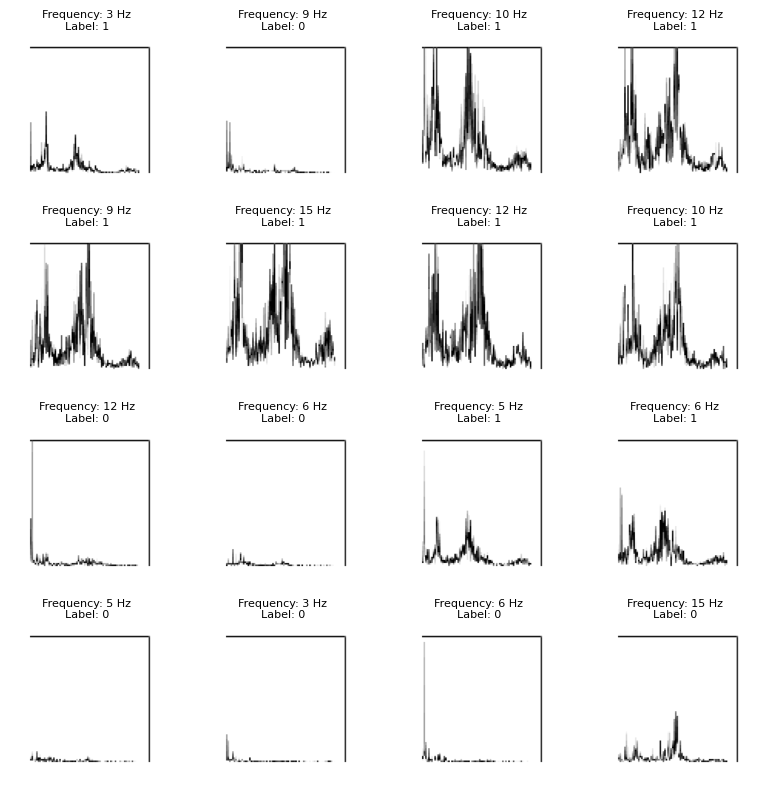

In [6]:
print('Experimental Data Plots')
# Generate 16 random indices from test_list
random_indices = np.random.choice(len(exp_data_list), 16, replace=False)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    current_sample = exp_data_list[random_indices[i]]
    image, frequency, label, _ = current_sample

    ax.imshow(image, cmap="gray")
    ax.set_title(f"Frequency: {frequency} Hz\nLabel: {label}", fontsize=8)
    
    # Remove axis ticks
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Convert the data list to separate numpy arrays
thr_images = np.array([item[0] for item in thr_data_list])
thr_frequencies = np.array([item[1] for item in thr_data_list], dtype=np.int)
thr_labels = np.array([item[2] for item in thr_data_list], dtype=np.int)
thr_axes = np.array([item[3] for item in thr_data_list], dtype=np.int)

print('Theoretical Data Shapes')
print(thr_images.shape)
print(thr_frequencies.shape)
print(thr_labels.shape)
print(thr_axes.shape)

Theoretical Data Shapes
(1064, 100, 100)
(1064,)
(1064,)
(1064, 3)


C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_13856\648198210.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  thr_frequencies = np.array([item[1] for item in thr_data_list], dtype=np.int)
C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_13856\648198210.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

In [8]:
# Convert the data list to separate numpy arrays
exp_images = np.array([item[0] for item in exp_data_list])
exp_frequencies = np.array([item[1] for item in exp_data_list], dtype=np.int)
exp_labels = np.array([item[2] for item in exp_data_list], dtype=np.int)
exp_axes = np.array([item[3] for item in exp_data_list], dtype=np.int)

print('Experimental Data Shapes')
print(exp_images.shape)
print(exp_frequencies.shape)
print(exp_labels.shape)
print(exp_axes.shape)

Experimental Data Shapes
(1122, 100, 100)
(1122,)
(1122,)
(1122, 3)


C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_13856\3089407478.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  exp_frequencies = np.array([item[1] for item in exp_data_list], dtype=np.int)
C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_13856\3089407478.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

In [9]:
X_thr = [thr_images, thr_frequencies, thr_axes]
y_thr = thr_labels
X_exp = [exp_images, exp_frequencies, exp_axes]
y_exp = exp_labels

X_train= X_exp 
y_train= y_exp 
X_test = X_thr
y_test = y_thr

In [10]:
# CNN for the image input
image_input = layers.Input(shape=(100, 100, 1), name='image_input')
x = layers.Conv2D(128, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
image_output = layers.Dense(32, activation='relu')(x)

# DNN for the frequency input
frequency_input = layers.Input(shape=(1,), name='frequency_input')
y = layers.Dense(32, activation='relu')(frequency_input)
frequency_output = layers.Dense(32, activation='relu')(y)

# DNN for the axis input
axis_input = layers.Input(shape=(3,), name='axis_input')
z = layers.Dense(32, activation='relu')(axis_input)
axis_output = layers.Dense(32, activation='relu')(z)

# Concatenate the outputs of all branches
combined = layers.concatenate([image_output, frequency_output, axis_output])
w = layers.Dense(32, activation='relu')(combined)
w = layers.Dense(16, activation='relu')(w)

# Output layer
output = layers.Dense(1, activation='sigmoid')(w)

model = Model(inputs=[image_input, frequency_input, axis_input], outputs=output)

In [11]:
# Define the optimizer with custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model using the custom optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

history = model.fit(X_train, y_train, epochs=20, shuffle=True)


Epoch 1/20
36/36 [==============================] - 7s 128ms/step - loss: 5.4142 - binary_accuracy: 0.6453
Epoch 2/20
36/36 [==============================] - 4s 116ms/step - loss: 0.2453 - binary_accuracy: 0.9135
Epoch 3/20
36/36 [==============================] - 4s 114ms/step - loss: 0.0458 - binary_accuracy: 0.9813
Epoch 4/20
36/36 [==============================] - 5s 142ms/step - loss: 0.0176 - binary_accuracy: 1.0000
Epoch 5/20
36/36 [==============================] - 4s 120ms/step - loss: 0.0149 - binary_accuracy: 1.0000
Epoch 6/20
36/36 [==============================] - 5s 148ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 7/20
36/36 [==============================] - 5s 133ms/step - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 8/20
36/36 [==============================] - 5s 136ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 9/20
36/36 [==============================] - 5s 137ms/step - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 10/20
36/36 [==================

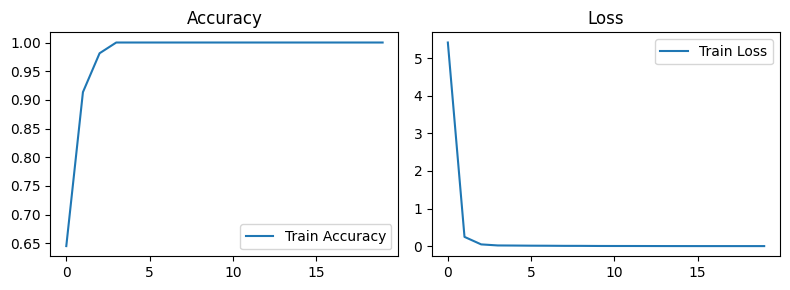

In [12]:
# Visualize the training history
plt.figure(figsize=(8, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [13]:
# Predict classes
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Generate classification report
report = classification_report(y_test, y_pred_classes)


print(report)# Predict classes

34/34 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       532
           1       0.87      1.00      0.93       532

    accuracy                           0.92      1064
   macro avg       0.93      0.92      0.92      1064
weighted avg       0.93      0.92      0.92      1064



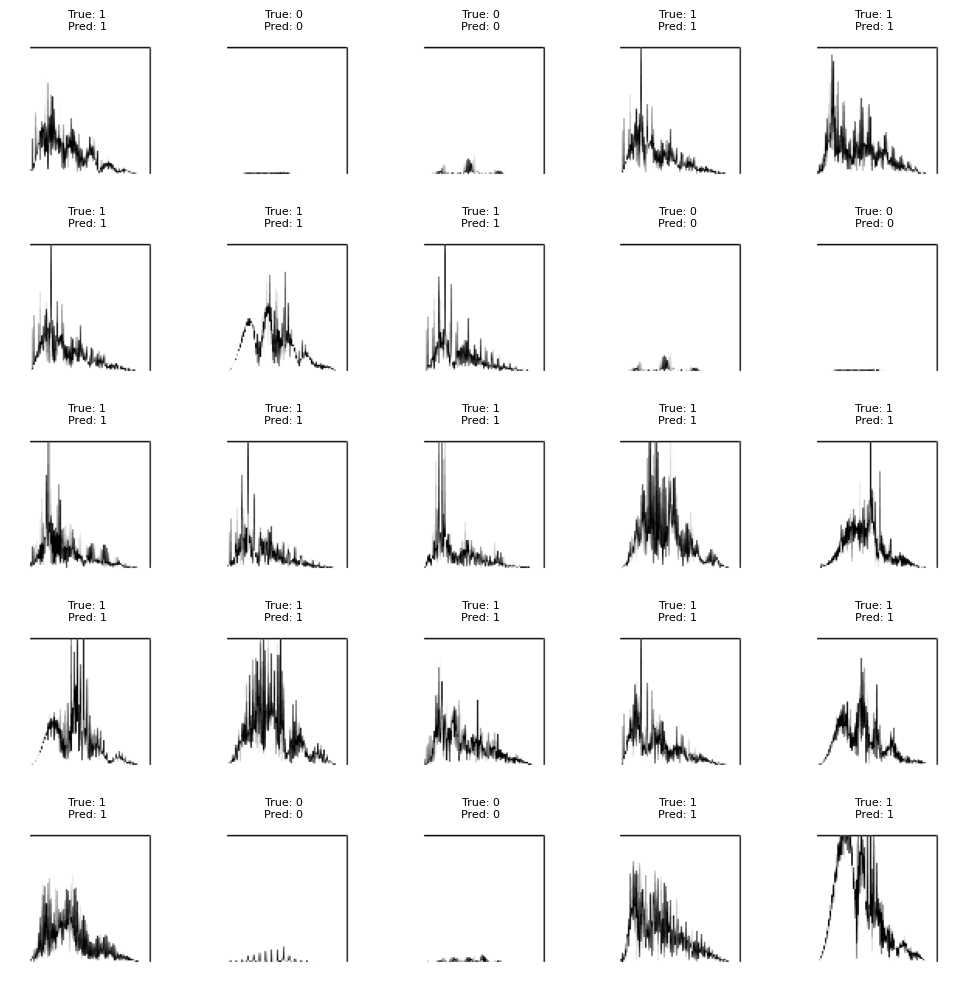

In [14]:
# Generate some random indices from test data
random_indices = np.random.choice(X_test[0].shape[0], 25, replace=False)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    # For the sake of the example, let's assume test_images are grayscale 2D arrays. 
    # If they are RGB, remove cmap="gray" from imshow
    ax.imshow(X_test[0][random_indices[i]], cmap="gray")
    
    # Set the title to show actual and predicted labels
    actual_label = y_test[random_indices[i]]
    predicted_label = y_pred_classes[random_indices[i]]
    ax.set_title(f"True: {actual_label}\nPred: {predicted_label}", fontsize = 8)
    
    # Remove axis ticks
    ax.axis('off')

plt.tight_layout()
plt.show()

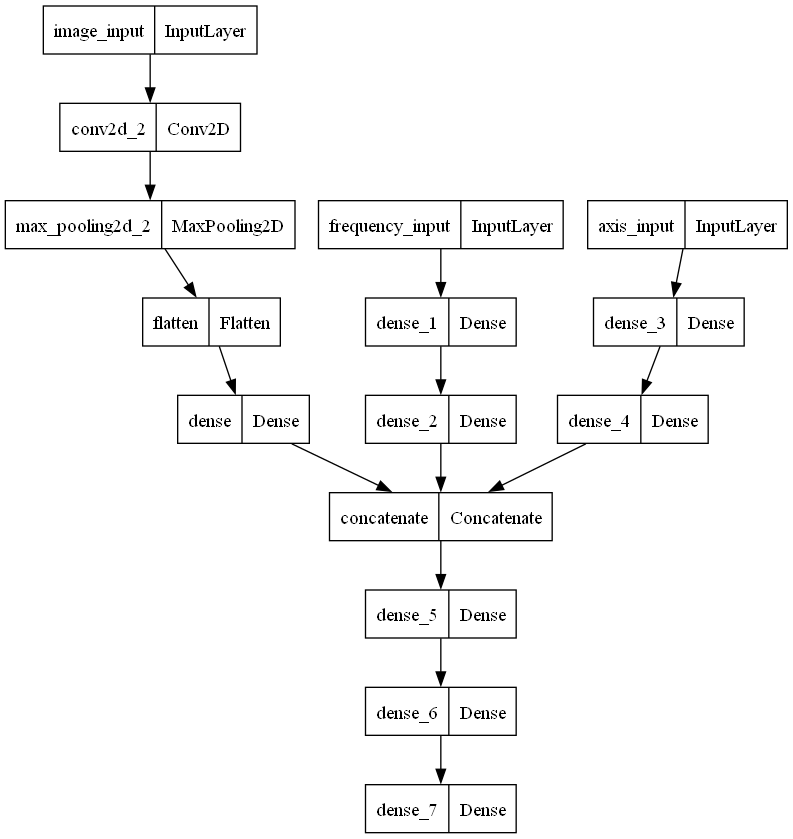

In [21]:
dot_img_file = 'E:\\IITP\\Academics\\7th Semester 26 Jul\'23 -\\BTP\\Py Notebooks\\exp_model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=False)